In [38]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as o
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#   
Neste estudo foram utilizadas as tabelas geradas nos estudos individuais de cada zona tomando como útil os imóveis que se apresentam entre a mediana e o Q3 de cada zona.

#    
As tabelas utilizadas são tabelas que contam apenas com os imóveis entre o intervalo acima comentado

In [39]:
df_s = pd.read_excel(r'med_q3_sul.xlsx')

df_s = df_s.drop(columns = ['Unnamed: 0'])
display(df_s)                     

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
0,2469688383,Zap Imóveis,Brooklin,Zona Sul,São Paulo,Aluguel,220,1100,3400,68,2,0,2,2,50.00,8.131531,-0.027190,3.912023,0.388942
1,2470707875,Zap Imóveis,Vila Clementino,Zona Sul,São Paulo,Aluguel,305,0,6000,140,3,0,2,3,42.86,8.699515,0.744127,3.757939,0.095904
2,2471846802,Zap Imóveis,Paraíso,Zona Sul,São Paulo,Aluguel,721,2332,8000,180,3,1,2,3,44.44,8.987197,1.134797,3.794140,0.164751
3,2472894791,Zap Imóveis,Brooklin,Zona Sul,São Paulo,Aluguel,870,1350,9000,198,3,3,4,5,45.45,9.104980,1.294745,3.816613,0.207490
4,2475393842,Zap Imóveis,Indianópolis,Zona Sul,São Paulo,Aluguel,500,1900,9000,160,2,1,1,1,56.25,9.104980,1.294745,4.029806,0.612943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18032,93641668,Zap Imóveis,Itaim Bibi,Zona Sul,São Paulo,Aluguel,2100,3700,12000,216,3,3,4,6,55.56,9.392662,1.685415,4.017464,0.589469
18033,2460791409,Zap Imóveis,Moema,Zona Sul,São Paulo,Aluguel,885,2636,10200,200,4,3,3,4,51.00,9.230143,1.464716,3.931826,0.426603
18034,2460792890,Zap Imóveis,Moema,Zona Sul,São Paulo,Aluguel,667,2600,11500,198,3,3,2,4,58.08,9.350102,1.627619,4.061821,0.673829
18035,2460793561,Zap Imóveis,Itaim Bibi,Zona Sul,São Paulo,Aluguel,202,2406,2003,42,1,1,1,1,47.69,7.602401,-0.745742,3.864722,0.298984


In [40]:
df_o = pd.read_excel(r'med_q3_oeste.xlsx')

df_o = df_o.drop(columns = ['Unnamed: 0'])
display(df_o)                     

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
0,2472535672,Zap Imóveis,Alto de Pinheiros,Zona Oeste,São Paulo,Aluguel,1139,0,15400,297,4,2,4,4,51.85,9.642123,2.024180,3.948355,0.458038
1,2472973378,Zap Imóveis,Sumarezinho,Zona Oeste,São Paulo,Aluguel,374,1600,5200,105,2,2,2,2,49.52,8.556414,0.549798,3.902377,0.370597
2,2476075979,Zap Imóveis,Pinheiros,Zona Oeste,São Paulo,Aluguel,145,1100,4500,90,3,1,1,3,50.00,8.411833,0.353458,3.912023,0.388942
3,2479305424,Zap Imóveis,Itaim Bibi,Zona Oeste,São Paulo,Aluguel,60,1000,4500,75,2,0,1,2,60.00,8.411833,0.353458,4.094345,0.735682
4,2479613577,Zap Imóveis,Itaim Bibi,Zona Oeste,São Paulo,Aluguel,0,1583,5000,100,2,2,2,2,50.00,8.517193,0.496536,3.912023,0.388942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10243,2500570903,Zap Imóveis,Vila Anastácio,Zona Oeste,São Paulo,Aluguel,0,513,2200,49,2,0,0,1,44.90,7.696213,-0.618347,3.804438,0.184336
10244,2460786068,Zap Imóveis,Barra Funda,Zona Oeste,São Paulo,Aluguel,42,1250,8000,162,3,1,2,2,49.38,8.987197,1.134797,3.899545,0.365212
10245,2460794759,Zap Imóveis,Alto da Lapa,Zona Oeste,São Paulo,Aluguel,380,1018,4300,95,3,1,1,2,45.26,8.366370,0.291720,3.812424,0.199523
10246,2457261010,Zap Imóveis,Pinheiros,Zona Oeste,São Paulo,Aluguel,250,1000,4500,80,2,1,1,2,56.25,8.411833,0.353458,4.029806,0.612943


In [41]:
df_c = pd.read_excel(r'med_q3_centro.xlsx')

df_c = df_c.drop(columns = ['Unnamed: 0'])
display(df_c)                     

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
0,2471352586,Zap Imóveis,Consolação,Centro,São Paulo,Aluguel,0,1144,9000,159,3,3,2,5,56.60,9.104980,1.294745,4.036009,0.624739
1,2471737382,Zap Imóveis,Cambuci,Centro,São Paulo,Aluguel,0,0,4400,103,2,2,1,3,42.72,8.389360,0.322940,3.754667,0.089682
2,2476833288,Zap Imóveis,Consolação,Centro,São Paulo,Aluguel,0,471,1650,35,1,0,0,1,47.14,7.408531,-1.009017,3.853122,0.276924
3,2479893385,Zap Imóveis,Barra Funda,Centro,São Paulo,Aluguel,96,655,2820,60,2,1,1,2,47.00,7.944492,-0.281186,3.850148,0.271267
4,2471783381,Zap Imóveis,Higienópolis,Centro,São Paulo,Aluguel,1000,2000,10000,220,4,2,4,5,45.45,9.210340,1.437824,3.816613,0.207490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7634,2500426908,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,9,642,2300,39,1,1,1,1,58.97,7.740664,-0.557982,4.077029,0.702751
7635,2500427776,Zap Imóveis,Consolação,Centro,São Paulo,Aluguel,15,517,1760,40,1,1,1,1,44.00,7.473069,-0.921374,3.784190,0.145828
7636,2500465691,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,106,500,2300,51,2,0,1,1,45.10,7.740664,-0.557982,3.808882,0.192788
7637,2460781815,Zap Imóveis,Santa Cecília,Centro,São Paulo,Aluguel,0,850,4900,85,2,0,0,2,57.65,8.496990,0.469101,4.054390,0.659697


In [42]:
df_n = pd.read_excel(r'med_q3_norte.xlsx')

df_n = df_n.drop(columns = ['Unnamed: 0'])
display(df_n)                     

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
0,2477451218,Zap Imóveis,Parque Peruche,Zona Norte,São Paulo,Aluguel,180,0,2400,95,2,1,1,2,25.26,7.783224,-0.500187,3.229222,-0.909612
1,2479843419,Zap Imóveis,Limão,Zona Norte,São Paulo,Aluguel,105,450,1500,50,2,0,1,1,30.00,7.313220,-1.138447,3.401197,-0.582549
2,2473963294,Zap Imóveis,Limão,Zona Norte,São Paulo,Aluguel,270,760,2990,98,3,1,2,3,30.51,8.003029,-0.201694,3.418054,-0.550490
3,2474881253,Zap Imóveis,Santana,Zona Norte,São Paulo,Aluguel,64,1200,1200,42,1,0,0,1,28.57,7.090077,-1.441474,3.352357,-0.675433
4,2475331649,Zap Imóveis,Vila Santa Maria,Zona Norte,São Paulo,Aluguel,213,750,1900,66,2,1,2,2,28.79,7.549609,-0.817434,3.360028,-0.660845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2476,2500426547,Zap Imóveis,Casa Verde,Zona Norte,São Paulo,Aluguel,0,402,1200,48,2,0,1,1,25.00,7.090077,-1.441474,3.218876,-0.929289
2477,2500426903,Zap Imóveis,Santana,Zona Norte,São Paulo,Aluguel,47,0,869,33,1,0,0,1,26.33,6.767343,-1.879744,3.270709,-0.830712
2478,2500456581,Zap Imóveis,Santana,Zona Norte,São Paulo,Aluguel,426,823,3000,95,3,3,2,2,31.58,8.006368,-0.197160,3.452524,-0.484936
2479,2500541073,Zap Imóveis,Água Fria,Zona Norte,São Paulo,Aluguel,120,630,2184,76,3,1,0,2,28.74,7.688913,-0.628260,3.358290,-0.664151


In [43]:
df_l = pd.read_excel(r'med_q3_leste.xlsx')

df_l = df_l.drop(columns = ['Unnamed: 0'])
display(df_l)                     

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
0,2475998780,Zap Imóveis,Vila Regente Feijó,Zona Leste,São Paulo,Aluguel,0,1600,4500,156,3,3,3,3,28.85,8.411833,0.353458,3.362110,-0.656885
1,2477330905,Zap Imóveis,Mooca,Zona Leste,São Paulo,Aluguel,25,754,2093,59,2,1,0,2,35.47,7.646354,-0.686055,3.568687,-0.264016
2,2477743481,Zap Imóveis,Vila Regente Feijó,Zona Leste,São Paulo,Aluguel,0,0,4500,156,3,3,3,0,28.85,8.411833,0.353458,3.362110,-0.656885
3,2475395837,Zap Imóveis,Mooca,Zona Leste,São Paulo,Aluguel,190,700,2900,88,3,1,2,2,32.95,7.972466,-0.243198,3.494991,-0.404171
4,2476004389,Zap Imóveis,Vila Formosa,Zona Leste,São Paulo,Aluguel,250,0,1350,45,2,0,1,1,30.00,7.207860,-1.281526,3.401197,-0.582549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2664,2500540973,Zap Imóveis,Tatuapé,Zona Leste,São Paulo,Aluguel,58,1270,3060,98,3,1,1,3,31.22,8.026170,-0.170268,3.441059,-0.506740
2665,2500541109,Zap Imóveis,Tatuapé,Zona Leste,São Paulo,Aluguel,100,500,1800,62,3,1,1,2,29.03,7.495542,-0.890856,3.368330,-0.645057
2666,2500576987,Zap Imóveis,Vila Prudente,Zona Leste,São Paulo,Aluguel,50,620,2500,75,3,1,2,2,33.33,7.824046,-0.444751,3.506458,-0.382364
2667,2500615711,Zap Imóveis,Vila Formosa,Zona Leste,São Paulo,Aluguel,0,305,1750,54,1,0,1,1,32.41,7.467371,-0.929112,3.478467,-0.435597


In [44]:
# Concatenação de todas as tabelas numa única a fim de facilitar a geração de gráficos e agrupamentos.

df_total = pd.concat([df_s, df_o, df_c, df_n, df_l])
display(df_total)

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
0,2469688383,Zap Imóveis,Brooklin,Zona Sul,São Paulo,Aluguel,220,1100,3400,68,2,0,2,2,50.00,8.131531,-0.027190,3.912023,0.388942
1,2470707875,Zap Imóveis,Vila Clementino,Zona Sul,São Paulo,Aluguel,305,0,6000,140,3,0,2,3,42.86,8.699515,0.744127,3.757939,0.095904
2,2471846802,Zap Imóveis,Paraíso,Zona Sul,São Paulo,Aluguel,721,2332,8000,180,3,1,2,3,44.44,8.987197,1.134797,3.794140,0.164751
3,2472894791,Zap Imóveis,Brooklin,Zona Sul,São Paulo,Aluguel,870,1350,9000,198,3,3,4,5,45.45,9.104980,1.294745,3.816613,0.207490
4,2475393842,Zap Imóveis,Indianópolis,Zona Sul,São Paulo,Aluguel,500,1900,9000,160,2,1,1,1,56.25,9.104980,1.294745,4.029806,0.612943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2664,2500540973,Zap Imóveis,Tatuapé,Zona Leste,São Paulo,Aluguel,58,1270,3060,98,3,1,1,3,31.22,8.026170,-0.170268,3.441059,-0.506740
2665,2500541109,Zap Imóveis,Tatuapé,Zona Leste,São Paulo,Aluguel,100,500,1800,62,3,1,1,2,29.03,7.495542,-0.890856,3.368330,-0.645057
2666,2500576987,Zap Imóveis,Vila Prudente,Zona Leste,São Paulo,Aluguel,50,620,2500,75,3,1,2,2,33.33,7.824046,-0.444751,3.506458,-0.382364
2667,2500615711,Zap Imóveis,Vila Formosa,Zona Leste,São Paulo,Aluguel,0,305,1750,54,1,0,1,1,32.41,7.467371,-0.929112,3.478467,-0.435597


In [45]:
dorm1 = df_total[df_total.Dormitorios == 1]
display(dorm1)

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
15,2475632391,Zap Imóveis,Santo Amaro,Zona Sul,São Paulo,Aluguel,250,750,3700,74,1,1,1,0,50.00,8.216088,0.087639,3.912023,0.388942
16,2476015801,Zap Imóveis,Ibirapuera,Zona Sul,São Paulo,Aluguel,111,667,1400,28,1,0,1,1,50.00,7.244228,-1.232139,3.912023,0.388942
21,2476368977,Zap Imóveis,Santo Amaro,Zona Sul,São Paulo,Aluguel,180,506,3222,57,1,1,1,2,56.53,8.077758,-0.100213,4.034771,0.622386
22,2480841792,Zap Imóveis,Paraíso,Zona Sul,São Paulo,Aluguel,80,675,2000,42,1,0,1,1,47.62,7.600902,-0.747778,3.863253,0.296191
30,2471790789,Zap Imóveis,Super Quadra Morumbi,Zona Sul,São Paulo,Aluguel,0,492,1707,39,1,0,1,1,43.77,7.442493,-0.962897,3.778949,0.135861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,2500236989,Zap Imóveis,Vila Formosa,Zona Leste,São Paulo,Aluguel,100,0,1250,40,1,0,0,1,31.25,7.130899,-1.386038,3.442019,-0.504913
2650,2500350894,Zap Imóveis,Brás,Zona Leste,São Paulo,Aluguel,58,747,1540,52,1,0,1,1,29.62,7.339538,-1.102709,3.388450,-0.606792
2651,2500350900,Zap Imóveis,Vila Prudente,Zona Leste,São Paulo,Aluguel,0,280,1290,36,1,0,0,1,35.83,7.162397,-1.343263,3.578786,-0.244811
2660,2500396857,Zap Imóveis,Vila Bertioga,Zona Leste,São Paulo,Aluguel,0,0,15000,500,1,0,0,6,30.00,9.615805,1.988442,3.401197,-0.582549


In [46]:
data_d1 = dorm1.groupby('Zona').agg(media =('Aluguel_m2', lambda p: p.mean())).round(2)
data_d1

,media
Zona,
Centro,50.16
Zona Leste,32.58
Zona Norte,28.00
Zona Oeste,52.82
Zona Sul,52.14


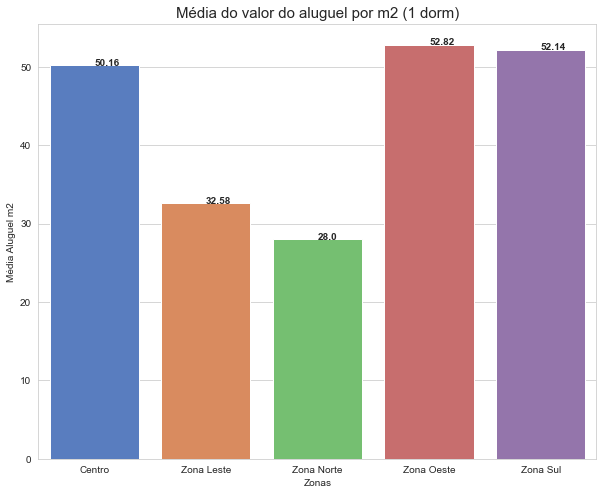

In [47]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x=data_d1.index, y='media', data=data_d1, ci=None, palette="muted",orient='v', )
ax.set_title("Média do valor do aluguel por m2 (1 dorm)", fontsize=15)
ax.set_xlabel ("Zonas")
ax.set_ylabel ("Média Aluguel m2")
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),rect.get_height(), weight='bold' )


In [48]:
dorm2 = df_total[df_total.Dormitorios == 2]
display(dorm2)

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
0,2469688383,Zap Imóveis,Brooklin,Zona Sul,São Paulo,Aluguel,220,1100,3400,68,2,0,2,2,50.00,8.131531,-0.027190,3.912023,0.388942
4,2475393842,Zap Imóveis,Indianópolis,Zona Sul,São Paulo,Aluguel,500,1900,9000,160,2,1,1,1,56.25,9.104980,1.294745,4.029806,0.612943
5,2475543416,Zap Imóveis,Campo Belo,Zona Sul,São Paulo,Aluguel,200,980,3000,65,2,0,2,1,46.15,8.006368,-0.197160,3.831897,0.236558
6,2476265800,Zap Imóveis,Jabaquara,Zona Sul,São Paulo,Aluguel,150,700,2500,50,2,1,1,2,50.00,7.824046,-0.444751,3.912023,0.388942
7,2477669429,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,0,1280,4000,70,2,1,2,2,57.14,8.294050,0.193510,4.045504,0.642798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656,2500352697,Zap Imóveis,Tatuapé,Zona Leste,São Paulo,Aluguel,91,654,1600,57,2,1,2,1,28.07,7.377759,-1.050805,3.334701,-0.709011
2659,2500389713,Zap Imóveis,Vila Prudente,Zona Leste,São Paulo,Aluguel,0,390,1694,50,2,0,0,1,33.88,7.434848,-0.973278,3.522825,-0.351237
2661,2500426532,Zap Imóveis,Vila Prudente,Zona Leste,São Paulo,Aluguel,110,287,1700,55,2,1,0,2,30.91,7.438384,-0.968477,3.431080,-0.525718
2662,2500512214,Zap Imóveis,Vila Formosa,Zona Leste,São Paulo,Aluguel,0,0,1730,54,2,0,1,1,32.04,7.455877,-0.944721,3.466985,-0.457433


In [49]:
data_d2 = dorm2.groupby('Zona').agg(media =('Aluguel_m2', lambda p: p.mean())).round(2)
data_d2

,media
Zona,
Centro,49.02
Zona Leste,32.29
Zona Norte,27.65
Zona Oeste,50.92
Zona Sul,50.95


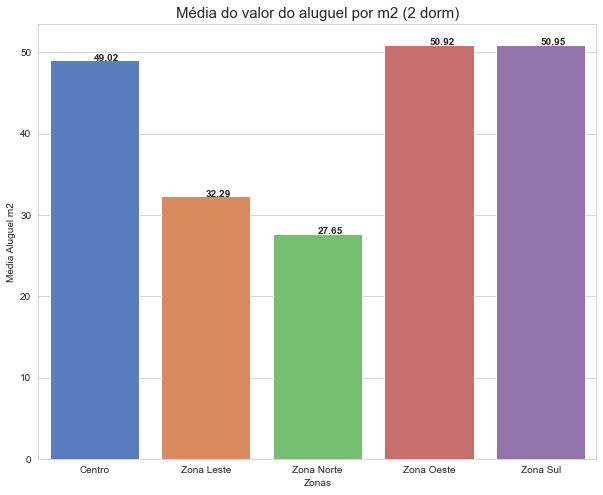

In [50]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x=data_d2.index, y='media', data=data_d2, ci=None, palette="muted",orient='v', )
ax.set_title("Média do valor do aluguel por m2 (2 dorm)", fontsize=15)
ax.set_xlabel ("Zonas")
ax.set_ylabel ("Média Aluguel m2")
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),rect.get_height(), weight='bold' )

In [51]:
dorm3 = df_total[df_total.Dormitorios == 3]
display(dorm3)

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
1,2470707875,Zap Imóveis,Vila Clementino,Zona Sul,São Paulo,Aluguel,305,0,6000,140,3,0,2,3,42.86,8.699515,0.744127,3.757939,0.095904
2,2471846802,Zap Imóveis,Paraíso,Zona Sul,São Paulo,Aluguel,721,2332,8000,180,3,1,2,3,44.44,8.987197,1.134797,3.794140,0.164751
3,2472894791,Zap Imóveis,Brooklin,Zona Sul,São Paulo,Aluguel,870,1350,9000,198,3,3,4,5,45.45,9.104980,1.294745,3.816613,0.207490
13,2479607683,Zap Imóveis,Cidade Monções,Zona Sul,São Paulo,Aluguel,600,2200,9000,197,3,1,2,0,45.69,9.104980,1.294745,3.821879,0.217507
17,2477464056,Zap Imóveis,Campo Belo,Zona Sul,São Paulo,Aluguel,0,1880,6500,129,3,1,1,3,50.39,8.779557,0.852825,3.919793,0.403719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2658,2500388240,Zap Imóveis,Tatuapé,Zona Leste,São Paulo,Aluguel,567,0,7000,250,3,3,3,4,28.00,8.853665,0.953463,3.332205,-0.713760
2664,2500540973,Zap Imóveis,Tatuapé,Zona Leste,São Paulo,Aluguel,58,1270,3060,98,3,1,1,3,31.22,8.026170,-0.170268,3.441059,-0.506740
2665,2500541109,Zap Imóveis,Tatuapé,Zona Leste,São Paulo,Aluguel,100,500,1800,62,3,1,1,2,29.03,7.495542,-0.890856,3.368330,-0.645057
2666,2500576987,Zap Imóveis,Vila Prudente,Zona Leste,São Paulo,Aluguel,50,620,2500,75,3,1,2,2,33.33,7.824046,-0.444751,3.506458,-0.382364


In [52]:
data_d3 = dorm3.groupby('Zona').agg(media =('Aluguel_m2', lambda p: p.mean())).round(2)
data_d3

,media
Zona,
Centro,48.83
Zona Leste,32.10
Zona Norte,28.06
Zona Oeste,51.06
Zona Sul,50.42


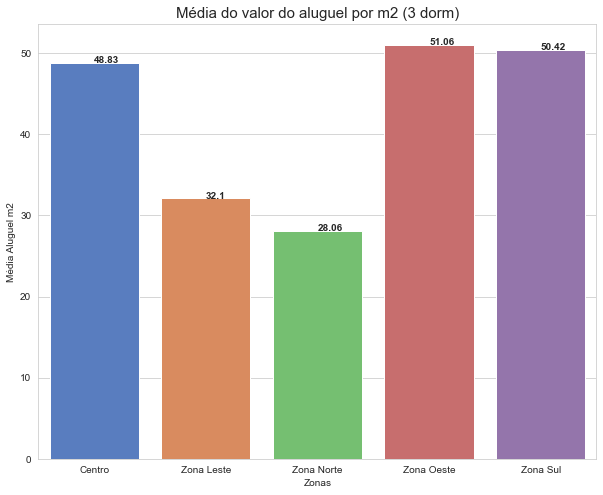

In [53]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x=data_d3.index, y='media', data=data_d3, ci=None, palette="muted",orient='v', )
ax.set_title("Média do valor do aluguel por m2 (3 dorm)", fontsize=15)
ax.set_xlabel ("Zonas")
ax.set_ylabel ("Média Aluguel m2")
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),rect.get_height(), weight='bold' )

In [54]:
dorm4 = df_total[df_total.Dormitorios == 4]
display(dorm4)

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
8,2479165880,Zap Imóveis,Paraíso,Zona Sul,São Paulo,Aluguel,2000,3000,15000,262,4,4,4,5,57.25,9.615805,1.988442,4.047428,0.646455
18,2477570691,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,3832,6124,20000,342,4,4,5,6,58.48,9.903488,2.379111,4.068685,0.686882
28,2480155564,Zap Imóveis,Vila Mascote,Zona Sul,São Paulo,Aluguel,957,0,15000,300,4,0,4,2,50.00,9.615805,1.988442,3.912023,0.388942
40,2476323406,Zap Imóveis,Santo Amaro,Zona Sul,São Paulo,Aluguel,0,5090,18000,337,4,4,4,5,53.41,9.798127,2.236033,3.977998,0.514414
53,2473244696,Zap Imóveis,Paraíso,Zona Sul,São Paulo,Aluguel,1087,3000,15000,310,4,2,3,5,48.39,9.615805,1.988442,3.879293,0.326696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,2499369275,Zap Imóveis,Jardim Anália Franco,Zona Leste,São Paulo,Aluguel,2250,4798,10000,345,4,4,4,5,28.99,9.210340,1.437824,3.366951,-0.647679
2533,2499389751,Zap Imóveis,Tatuapé,Zona Leste,São Paulo,Aluguel,400,0,2450,80,4,0,2,2,30.62,7.803843,-0.472186,3.421653,-0.543646
2577,2499801681,Zap Imóveis,Jardim Anália Franco,Zona Leste,São Paulo,Aluguel,1184,0,10000,325,4,2,2,4,30.77,9.210340,1.437824,3.426540,-0.534352
2578,2499814202,Zap Imóveis,Tatuapé,Zona Leste,São Paulo,Aluguel,297,840,4000,112,4,2,3,2,35.71,8.294050,0.193510,3.575431,-0.251191


In [55]:
data_d4 = dorm4.groupby('Zona').agg(media =('Aluguel_m2', lambda p: p.mean())).round(2)
data_d4

,media
Zona,
Centro,48.17
Zona Leste,31.65
Zona Norte,28.18
Zona Oeste,51.20
Zona Sul,51.63


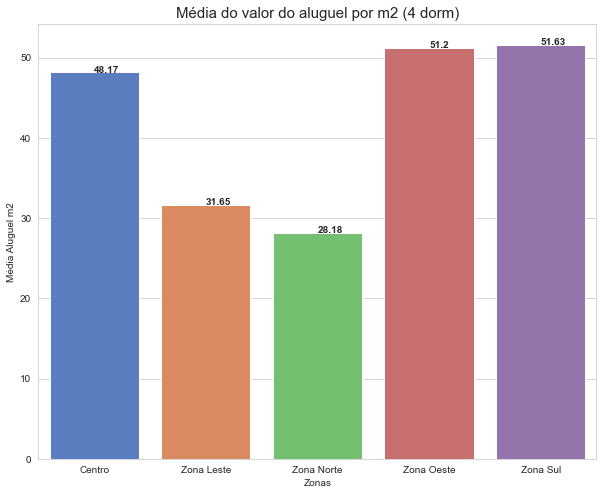

In [56]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x=data_d4.index, y='media', data=data_d4, ci=None, palette="muted",orient='v', )
ax.set_title("Média do valor do aluguel por m2 (4 dorm)", fontsize=15)
ax.set_xlabel ("Zonas")
ax.set_ylabel ("Média Aluguel m2")
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),rect.get_height(), weight='bold' )